### Vectorstores and Embeddings

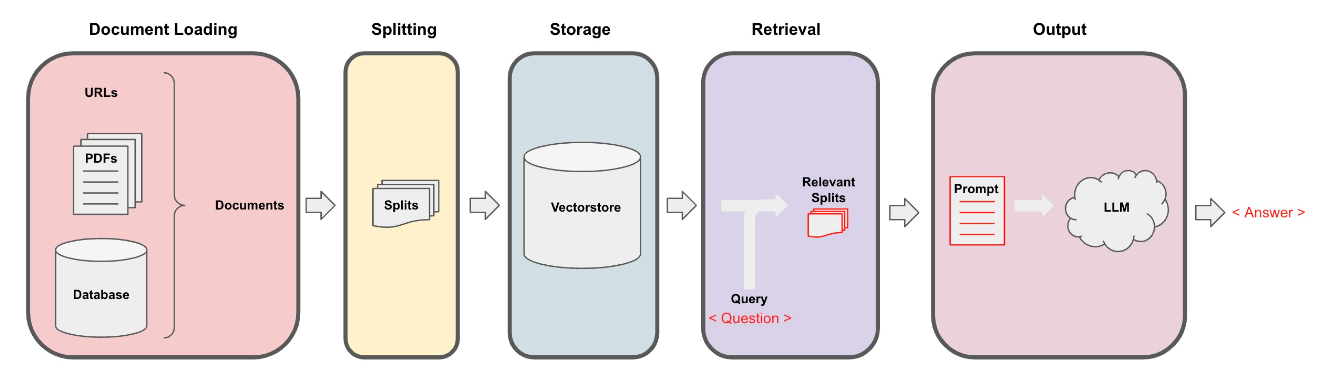

- We've now got our document split up into small, semantically meaningful chunks, and it's time to put these chunks into an idex, whereby we can easily retrieve them when it comes time to answer questions about this corpus of data.

- To do that, we're going to utilize embeddings and vector stores.


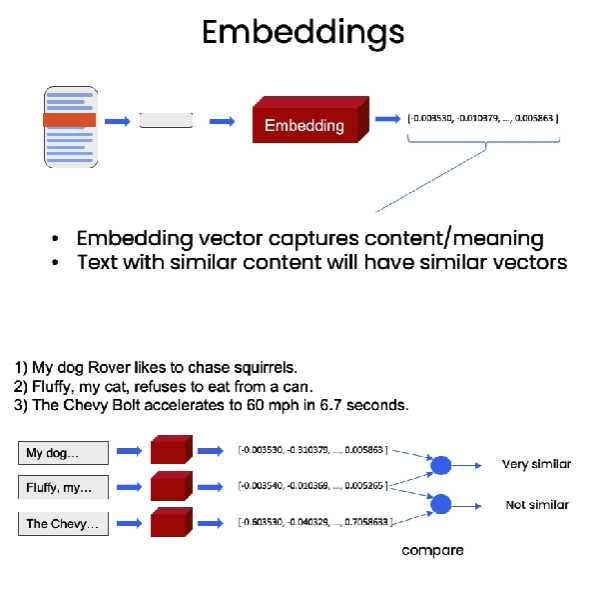

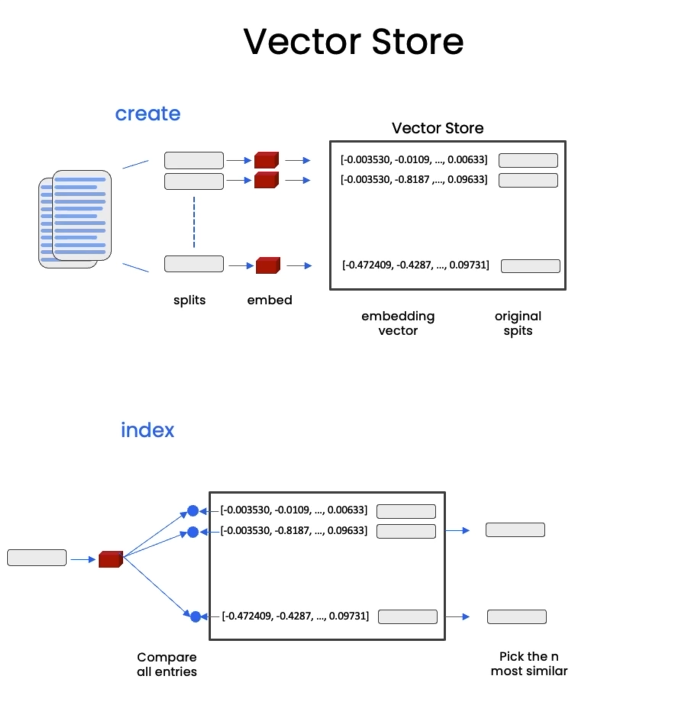

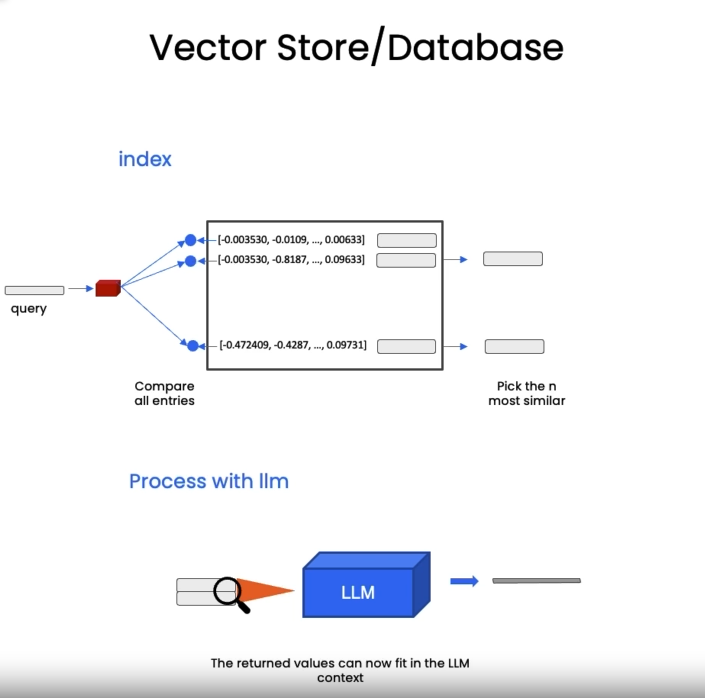

In [1]:
import os
import openai
import sys
# sys.path.append('../..')

# from dotenv import load_dotenv, find_dotenv
# _ = load_dotenv(find_dotenv()) # read local .env file

# openai.api_key  = os.environ['OPENAI_API_KEY']

In [2]:
from langchain.document_loaders import PyPDFLoader

# Load PDF
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf"),
    PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf"),
    PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture02.pdf"),
    PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture03.pdf")
]

In [3]:
docs = []
for loader in loaders:
    docs.extend(loader.load())

In [5]:
len(docs)

78

In [6]:
# Split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [7]:
splits = text_splitter.split_documents(docs)

In [8]:
len(splits)

209

In [12]:
print(splits[198].page_content)

or one then the probability of Y equals zero is  going to be that. All right? So more simply 
it turns out – actually, take th ese two equations and write them more compactly. Write P 
of Y given X parameterized by theta. This is going to be H subscript theta of X to the 
power of Y times one minus H of X to  the power of one minus Y. Okay?  
So I know this looks somewhat bizarre, but th is actually makes the variation much nicer. 
So Y is equal to one then this equation is H of X to the power of one times something to 
the power of zero. So anything to the power of zero is just one, righ t? So Y equals one 
then this is something to the pow er of zero and so this is just one. So if Y equals one this 
is just saying P of Y equals one is equal to H subscript theta of X. Okay? And in the same 
way, if Y is equal to zero then this is P of Y equals zero equals this thing to the power of 
zero and so this disappears. This is just one times this thing power of one. Okay? So this 
is a compac

#### Embeddings
- Let's take our splits and embed them.

In [41]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding_model = OpenAIEmbeddings(openai_api_key="ENTER_YOUR_API_KEY")

In [42]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [43]:
embedding1 = embedding_model.embed_query(sentence1)
embedding2 = embedding_model.embed_query(sentence2)
embedding3 = embedding_model.embed_query(sentence3)

In [18]:
import numpy as np

In [19]:
np.dot(embedding1, embedding2)   # Higher the number more the relevancy is

0.9631853877103518

In [20]:
np.dot(embedding1, embedding3)

0.7710459304414047

In [21]:
np.dot(embedding2, embedding3)

0.7596757162288662

In [23]:
len(embedding1)

1536

#### Vectorstores

In [ ]:
# !pip install chromadb

In [30]:
from langchain.vectorstores import Chroma

In [ ]:
persist_directory = 'docs/chroma/'

In [27]:
# !rm -rf ./docs/chroma  # remove old database files if any

In [49]:
# vectordb = Chroma.from_documents(
#                                     documents=splits,
#                                     embedding=embedding_model,
#                                     persist_directory=persist_directory
#                                 )

#### FAISS
- Facebook AI Similarity Search (Faiss) is a library for efficient similarity search and clustering of dense vectors.

In [55]:
from langchain.vectorstores import FAISS

In [54]:
db = FAISS.from_documents(splits, embedding_model)

#### Similarity Search

In [56]:
question = "is there an email i can ask for help"

In [57]:
docs = db.similarity_search(question, k=3)

In [61]:
len(docs)

3

In [59]:
docs[0].page_content

"cs229-qa@cs.stanford.edu. This goes to an acc ount that's read by all the TAs and me. So \nrather than sending us email individually, if you send email to this account, it will \nactually let us get back to you maximally quickly with answers to your questions.  \nIf you're asking questions about homework probl ems, please say in the subject line which \nassignment and which question the email refers to, since that will also help us to route \nyour question to the appropriate TA or to me  appropriately and get the response back to \nyou quickly.  \nLet's see. Skipping ahead — let's see — for homework, one midterm, one open and term \nproject. Notice on the honor code. So one thi ng that I think will help you to succeed and \ndo well in this class and even help you to enjoy this cla ss more is if you form a study \ngroup.  \nSo start looking around where you' re sitting now or at the end of class today, mingle a \nlittle bit and get to know your classmates. I strongly encourage you to f

In [60]:
print(docs[0].page_content)

cs229-qa@cs.stanford.edu. This goes to an acc ount that's read by all the TAs and me. So 
rather than sending us email individually, if you send email to this account, it will 
actually let us get back to you maximally quickly with answers to your questions.  
If you're asking questions about homework probl ems, please say in the subject line which 
assignment and which question the email refers to, since that will also help us to route 
your question to the appropriate TA or to me  appropriately and get the response back to 
you quickly.  
Let's see. Skipping ahead — let's see — for homework, one midterm, one open and term 
project. Notice on the honor code. So one thi ng that I think will help you to succeed and 
do well in this class and even help you to enjoy this cla ss more is if you form a study 
group.  
So start looking around where you' re sitting now or at the end of class today, mingle a 
little bit and get to know your classmates. I strongly encourage you to form study gro

In [63]:
print(docs[1].page_content)

cs229-qa@cs.stanford.edu. This goes to an acc ount that's read by all the TAs and me. So 
rather than sending us email individually, if you send email to this account, it will 
actually let us get back to you maximally quickly with answers to your questions.  
If you're asking questions about homework probl ems, please say in the subject line which 
assignment and which question the email refers to, since that will also help us to route 
your question to the appropriate TA or to me  appropriately and get the response back to 
you quickly.  
Let's see. Skipping ahead — let's see — for homework, one midterm, one open and term 
project. Notice on the honor code. So one thi ng that I think will help you to succeed and 
do well in this class and even help you to enjoy this cla ss more is if you form a study 
group.  
So start looking around where you' re sitting now or at the end of class today, mingle a 
little bit and get to know your classmates. I strongly encourage you to form study gro

In [64]:
print(docs[2].page_content)

So all right, online resources. The class has a home page, so it's in on the handouts. I 
won't write on the chalkboard — http:// cs229.stanford.edu. And so when there are 
homework assignments or things like that, we  usually won't sort of — in the mission of 
saving trees, we will usually not give out many handouts in class. So homework 
assignments, homework solutions will be posted online at the course home page.  
As far as this class, I've also written, a nd I guess I've also revised every year a set of 
fairly detailed lecture notes that cover the te chnical content of this  class. And so if you 
visit the course homepage, you'll also find the detailed lecture notes that go over in detail 
all the math and equations and so on  that I'll be doing in class.  
There's also a newsgroup, su.class.cs229, also written on the handout. This is a 
newsgroup that's sort of a forum for people in  the class to get to  know each other and 
have whatever discussions you want to ha ve amongst y

#### Failure modes

- This seems great, and basic similarity search will get you 80% of the way there very  easily
- But there are some failure modes that can creep up.
- Here are some edge cases that can arise - we'll fix them in the next class.

In [65]:
question = "what did they say about matlab?"

In [67]:
docs = db.similarity_search(question,k=5)

In [69]:
print(docs[0].page_content)

those homeworks will be done in either MATLA B or in Octave, which is sort of — I 
know some people call it a free ve rsion of MATLAB, which it sort  of is, sort of isn't.  
So I guess for those of you that haven't s een MATLAB before, and I know most of you 
have, MATLAB is I guess part of the programming language that makes it very easy to write codes using matrices, to write code for numerical routines, to move data around, to 
plot data. And it's sort of an extremely easy to  learn tool to use for implementing a lot of 
learning algorithms.  
And in case some of you want to work on your  own home computer or something if you 
don't have a MATLAB license, for the purposes of  this class, there's also — [inaudible] 
write that down [inaudible] MATLAB — there' s also a software package called Octave 
that you can download for free off the Internet. And it has somewhat fewer features than MATLAB, but it's free, and for the purposes of  this class, it will work for just about 
everythin

In [70]:
print(docs[1].page_content)

those homeworks will be done in either MATLA B or in Octave, which is sort of — I 
know some people call it a free ve rsion of MATLAB, which it sort  of is, sort of isn't.  
So I guess for those of you that haven't s een MATLAB before, and I know most of you 
have, MATLAB is I guess part of the programming language that makes it very easy to write codes using matrices, to write code for numerical routines, to move data around, to 
plot data. And it's sort of an extremely easy to  learn tool to use for implementing a lot of 
learning algorithms.  
And in case some of you want to work on your  own home computer or something if you 
don't have a MATLAB license, for the purposes of  this class, there's also — [inaudible] 
write that down [inaudible] MATLAB — there' s also a software package called Octave 
that you can download for free off the Internet. And it has somewhat fewer features than MATLAB, but it's free, and for the purposes of  this class, it will work for just about 
everythin

- Notice that we are getting duplicate chuks (because of the duplicate **MachineLearning-Lecture01.pdf** in the index)
- Semantic search fetches all similar documents, but does not enforce diversity.

- docs[0] and docs[1] are identical.

- We can see a new failure mode.

- The question below asks a question about the third lecture, but includes results from other lectures as well.

In [71]:
question = "what did they say about regression in the third lecture?"

In [72]:
docs = db.similarity_search(question,k=5)

In [73]:
for doc in docs:
    print(doc.metadata)

{'source': 'docs/cs229_lectures/MachineLearning-Lecture03.pdf', 'page': 0}
{'source': 'docs/cs229_lectures/MachineLearning-Lecture02.pdf', 'page': 2}
{'source': 'docs/cs229_lectures/MachineLearning-Lecture03.pdf', 'page': 14}
{'source': 'docs/cs229_lectures/MachineLearning-Lecture03.pdf', 'page': 4}
{'source': 'docs/cs229_lectures/MachineLearning-Lecture02.pdf', 'page': 0}


In [74]:
print(docs[4].page_content)

really makes a difference between a good so lution and amazing solution. And to give 
everyone to just how we do points assignments, or what is it that causes a solution to get 
full marks, or just how to write amazing so lutions. Becoming a grad er is usually a good 
way to do that.  
Graders are paid positions and you also get free  food, and it's usually fun for us to sort of 
hang out for an evening and grade all the a ssignments. Okay, so I will send email. So 
don't email me yet if you want to be a grader. I'll send email to the entire class later with 
the administrative details and to solicit app lications. So you can email us back then, to 
apply, if you'd be interested in being a grader.  
Okay, any questions about that? All right, okay, so let's get started with today's material. 
So welcome back to the second lecture. What  I want to do today is talk about linear 
regression, gradient descent, and the norma l equations. And I should also say, lecture 
notes have been posted

##### Approaches discussed in the next lecture can be used to address both!